## Import Data and dependencies
---

In [12]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt

# CSV path and read in
datapath = 'Data_set/clean_spotify_youtube.csv'
cat_data = pd.read_csv(datapath)

# display sample of data
cat_data.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,138.559,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,92.761,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,108.014,215150.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,120.423,233867.0,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,167.953,340920.0,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08


## Write a function to use for .groupby
---

In [23]:
def sum_data(group=['Artist','Album_type','Licensed','official_video'],column=['Views','Stream'],num_spots=2,color=str):

    group_df = cat_data.groupby(group).agg({column:'sum'}).sort_values(column,ascending=False).reset_index()
    group_df_1 = cat_data.groupby(group).agg({column:'mean'}).sort_values(column,ascending=False).reset_index()

    plot_df = group_df.head(num_spots).sort_values(by=column,ascending=False)
    group_df.loc[:,str(column)] = group_df[str(column)].map('{:,.0f}'.format)
    group_df_1.loc[:,str(column)] = group_df_1[str(column)].map('{:,.0f}'.format)
    
    plt.bar(plot_df[group].astype('str'),plot_df[column],color=color)
    
    # the line below turns the scientific notation into regular numbers but makes the chart more difficult to read
    #plt.ticklabel_format(axis = 'y', style='plain')
    
    plt.xlabel(group)
    plt.ylabel(column + ' (scientific notation)')
    plt.xticks(rotation=90)
    plt.title(f"{column} by {group}")
    plt.savefig(f"./Data_set/{group}_by_{column}.png")
    plt.show()
    print(f"Showing Top {num_spots} Spots by {column}")
    return group_df.head(num_spots) , group_df_1.head(num_spots)
    

## Group by artist 
---

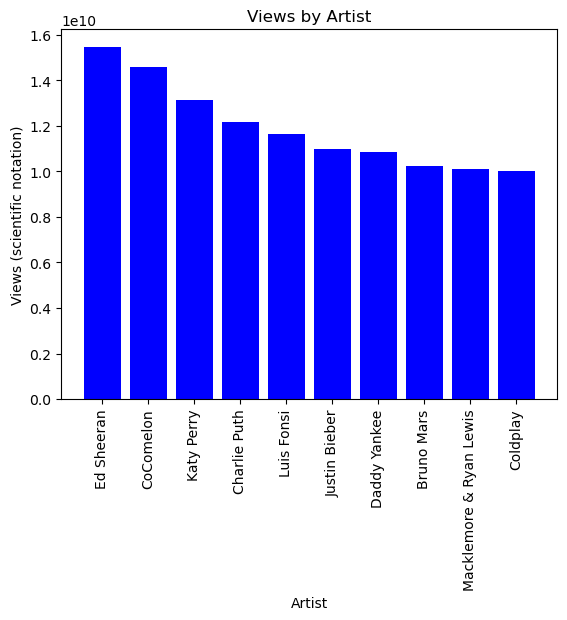

Showing Top 10 Spots by Views


(                    Artist           Views
 0               Ed Sheeran  15,460,207,769
 1                CoComelon  14,601,671,211
 2               Katy Perry  13,120,632,075
 3             Charlie Puth  12,167,594,191
 4               Luis Fonsi  11,628,113,031
 5            Justin Bieber  10,991,060,236
 6             Daddy Yankee  10,871,926,842
 7               Bruno Mars  10,240,919,227
 8  Macklemore & Ryan Lewis  10,122,055,560
 9                 Coldplay   9,997,277,884,
                     Artist          Views
 0               Ed Sheeran  1,546,020,777
 1                CoComelon  1,460,167,121
 2               Katy Perry  1,312,063,208
 3             Charlie Puth  1,216,759,419
 4               Luis Fonsi  1,162,811,303
 5            Justin Bieber  1,099,106,024
 6             Daddy Yankee  1,087,192,684
 7               Bruno Mars  1,024,091,923
 8  Macklemore & Ryan Lewis  1,012,205,556
 9                 Coldplay    999,727,788)

In [27]:
sum_data('Artist','Views',10,'blue')

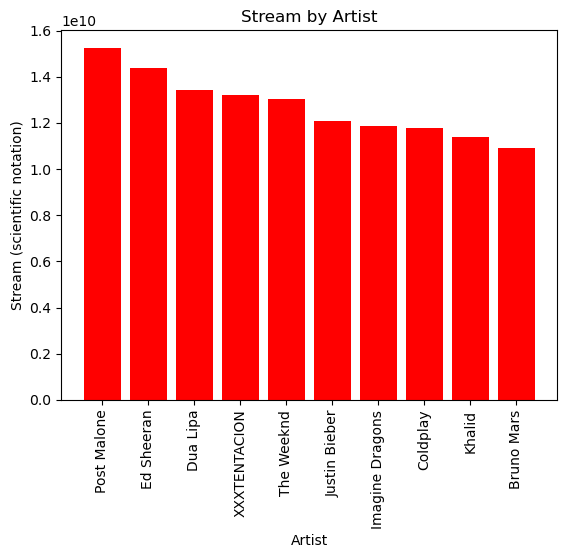

Showing Top 10 Spots by Stream


(            Artist          Stream
 0      Post Malone  15,251,263,853
 1       Ed Sheeran  14,394,881,557
 2         Dua Lipa  13,408,076,274
 3     XXXTENTACION  13,224,351,699
 4       The Weeknd  13,031,973,376
 5    Justin Bieber  12,097,767,422
 6  Imagine Dragons  11,858,310,928
 7         Coldplay  11,778,478,236
 8           Khalid  11,386,839,915
 9       Bruno Mars  10,897,862,950,
             Artist         Stream
 0      Post Malone  1,525,126,385
 1       Ed Sheeran  1,439,488,156
 2         Dua Lipa  1,340,807,627
 3     XXXTENTACION  1,322,435,170
 4       The Weeknd  1,303,197,338
 5    Justin Bieber  1,209,776,742
 6  Imagine Dragons  1,185,831,093
 7         Coldplay  1,177,847,824
 8           Khalid  1,138,683,992
 9       Bruno Mars  1,089,786,295)

In [28]:
sum_data('Artist','Stream',10,'red')

## Group by Album Type
---

better off looking at average 

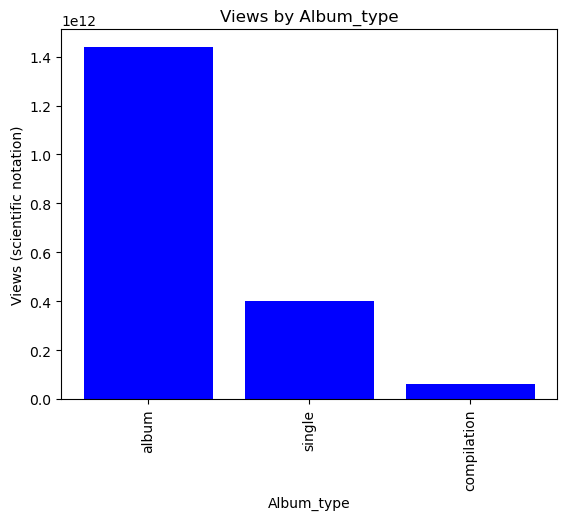

Showing Top 3 Spots by Views


(    Album_type              Views
 0        album  1,438,910,059,139
 1       single    401,916,456,409
 2  compilation     61,226,486,759,
     Album_type       Views
 0        album  98,427,393
 1       single  82,698,859
 2  compilation  79,618,318)

In [29]:
sum_data('Album_type','Views',3,'blue')

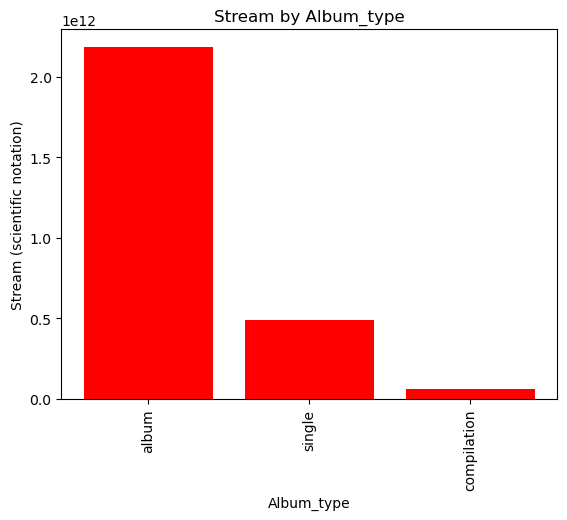

Showing Top 3 Spots by Stream


(    Album_type             Stream
 0        album  2,183,382,627,508
 1       single    493,103,212,262
 2  compilation     61,661,758,924,
     Album_type       Stream
 0        album  149,978,199
 1       single  101,670,765
 2  compilation   84,007,846)

In [30]:
sum_data('Album_type','Stream',3,'red')

## Group by Licensed
---

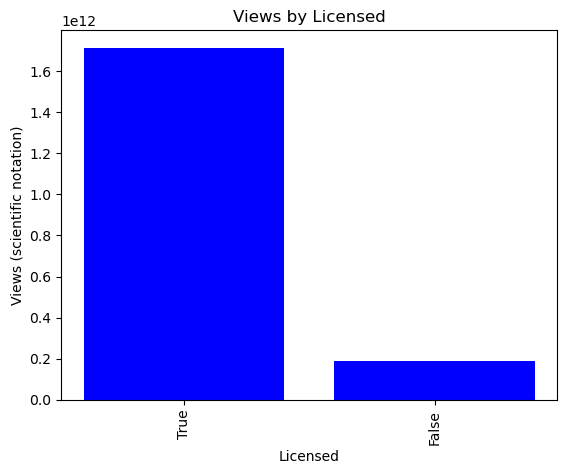

Showing Top 5 Spots by Views


(   Licensed              Views
 0      True  1,713,218,436,430
 1     False    188,834,565,877,
    Licensed        Views
 0      True  121,161,134
 1     False   30,915,941)

In [31]:
sum_data('Licensed','Views',5,'blue')

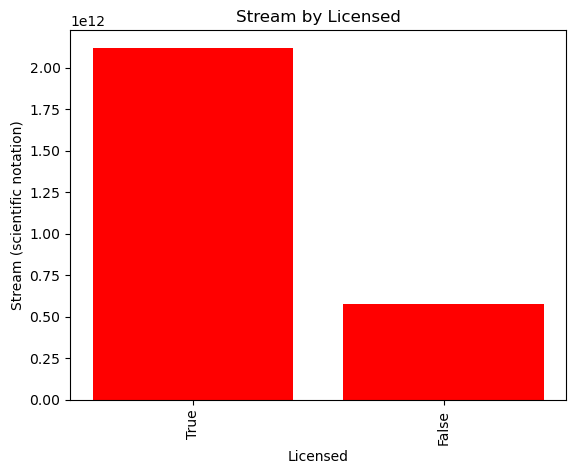

Showing Top 5 Spots by Stream


(   Licensed             Stream
 0      True  2,120,642,657,923
 1     False    575,760,230,600,
    Licensed       Stream
 0      True  153,848,132
 1     False   97,454,338)

In [32]:
sum_data('Licensed','Stream',5,'red')

## Grouped by Official Video 
---

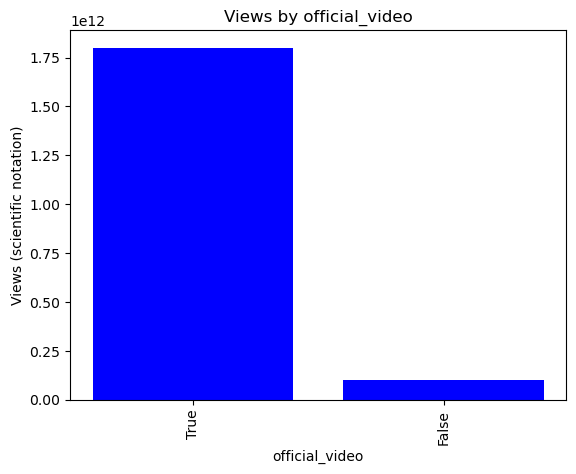

Showing Top 5 Spots by Views


(   official_video              Views
 0            True  1,800,201,071,589
 1           False    101,851,930,718,
    official_video        Views
 0            True  114,494,757
 1           False   22,508,714)

In [33]:
sum_data('official_video','Views',5,'blue')

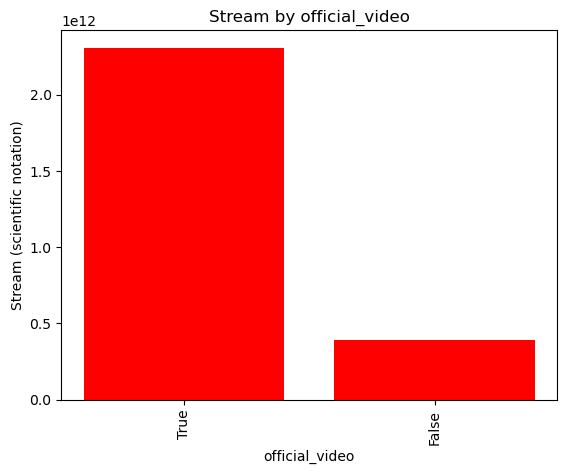

Showing Top 5 Spots by Stream


(   official_video             Stream
 0            True  2,308,140,276,225
 1           False    388,262,612,298,
    official_video       Stream
 0            True  150,583,264
 1           False   88,969,435)

In [34]:
sum_data('official_video','Stream',5,'red')